# Fetal Health Prediction Model

Created by Brodie Berger for study purposes for an Internship at Virtua Health's Data Science Department.

This model predicts and classifies the health and wellbeing of a fetus during pregnancy. The model splits and learns from a dataset in order to make a predict an element into 3 classes of health. 
- Normal (1)
- Suspect (2)
- Pathological (3)

Dataset Link: https://www.kaggle.com/datasets/andrewmvd/fetal-health-classification

In [42]:
import pandas as pd
import numpy as np
df = pd.read_csv('fetal_health.csv')

## Exploring Dataset

We will begin by exploring the dataset. We will document the column names and data types, before understanding the meaning and purpose behind each column.

In [43]:
print(f"# of Col | # of Rows\n{df.shape}")

# of Col | # of Rows
(2126, 22)


In [44]:
print("Column Names and Datatypes")
df.info()

Column Names and Datatypes
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2126 entries, 0 to 2125
Data columns (total 22 columns):
 #   Column                                                  Non-Null Count  Dtype  
---  ------                                                  --------------  -----  
 0   baseline value                                          2126 non-null   float64
 1   accelerations                                           2126 non-null   float64
 2   fetal_movement                                          2126 non-null   float64
 3   uterine_contractions                                    2126 non-null   float64
 4   light_decelerations                                     2126 non-null   float64
 5   severe_decelerations                                    2126 non-null   float64
 6   prolongued_decelerations                                2126 non-null   float64
 7   abnormal_short_term_variability                         2126 non-null   float64
 8   mean_value_

## Understanding Attributes

##### 1.  baseline_value – Baseline Fetal Heart Rate (FHR)
- The average heart rate of the fetus when there's no stress, movement, or contraction. Usually between 110 and 160 bpm.
- Units: Beats per Minute (BPM)
- Importance: Too high (tachycardia) or too low (bradycardia) can signal stress, hypoxia, or infection.

#### 2. accelerations – Number of accelerations per second
- Temporary increases in fetal heart rate, often in response to movement or contractions.
- Units: Count per second (though values are usually low, e.g., 0.001–0.02).
- Importance: Frequent accelerations are generally a good sign, indicating a healthy autonomic nervous system.

#### 3. fetal_movement – Number of fetal movements per second
- Detected body movements of the fetus.
- Units: Count per second (Also very small values).
- Importance: Movement is typically associated with healthy neural development. Decreased movement could suggest hypoxia or distress.

#### 4. uterine_contractions – Number of uterine contractions per second
- Detected uterine muscle contractions.
- Units: Count per second (very small values, often less than 0.01).
- Importance: Frequent or intense contractions can affect fetal oxygen levels, especially if they occur too close together.

#### 5. light_decelerations – Number of light decelerations per second
- Small drops in fetal heart rate, typically harmless and short-lived.
- Units: Count per second (very small values, often less than 0.01).
- Importance: In small amounts, they may be normal. In large numbers, they may suggest cord compression or mild stress.

#### 6. severe_decelerations – Number of severe decelerations per second
- Sharp, significant drops in fetal heart rate.
- Units: Count per second (very small values, often less than 0.01).
- Importance: A serious warning sign. Could indicate placental insufficiency, cord prolapse, or hypoxia.

#### 7. prolongued_decelerations – Number of prolonged decelerations per second
- Drops in heart rate that last longer than 2 minutes.
- Units: Count per second (very small values, often less than 0.01).
- Importance: Indicates sustained fetal distress — very concerning if occurring frequently.

#### 8. abnormal_short_term_variability – % of time with abnormal short-term variability
- Percentage of time where short-term (beat-to-beat) heart rate variability is outside the normal range.
- Units: Percentage (%). Written as whole numbers.
- Importance: A lack of variability can mean central nervous system issues or fetal hypoxia.

#### 9. mean_value_of_short_term_variability
- The average value of short-term variability in fetal heart rate.
- Units: Unsure of how to quantify this value.
- Importance: Healthy fetuses typically have some natural variability. Too low = bad; too high = possible stress.

#### 10. percentage_of_time_with_abnormal_long_term_variability
- Long-term variability is the overall fluctuation in heart rate over longer windows (e.g., minutes).
- Units: Percentage (%). Written as whole numbers.
- Importance: Low variability over a long period can indicate loss of autonomic regulation, often due to hypoxia.


#### Histogram Attributes
The remaining values are related to the histogram of fetal heart rate measurements. This histogram captures distribution of fetus heart rate measurements. Each stat is relatively self explanatory.
- width
- min
- max
- number_of_peaks
- number_of_zeroes
- mode
- mean
- median
- variance
- tendency

#### Fetal Health
Finally, the fetal_health attribute represents the classification of health by experts who have reviewed the dataset. This is the target variable that we will be predicting.
- 1 - Normal
- 2 - Suspect
- 3 - Pathological

In [45]:
print("Snippit of Data:")
df.head()

Snippit of Data:


,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,...,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency,fetal_health
0,120.0,0.000,0.0,0.000,0.000,0.0,0.0,73.0,0.5,43.0,...,62.0,126.0,2.0,0.0,120.0,137.0,121.0,73.0,1.0,2.0
1,132.0,0.006,0.0,0.006,0.003,0.0,0.0,17.0,2.1,0.0,...,68.0,198.0,6.0,1.0,141.0,136.0,140.0,12.0,0.0,1.0
2,133.0,0.003,0.0,0.008,0.003,0.0,0.0,16.0,2.1,0.0,...,68.0,198.0,5.0,1.0,141.0,135.0,138.0,13.0,0.0,1.0
3,134.0,0.003,0.0,0.008,0.003,0.0,0.0,16.0,2.4,0.0,...,53.0,170.0,11.0,0.0,137.0,134.0,137.0,13.0,1.0,1.0
4,132.0,0.007,0.0,0.008,0.000,0.0,0.0,16.0,2.4,0.0,...,53.0,170.0,9.0,0.0,137.0,136.0,138.0,11.0,1.0,1.0


In [46]:
print("Basic information on all columns")
df.describe().T

Basic information on all columns


,count,mean,std,min,25%,50%,75%,max
baseline value,2126.0,133.303857,9.840844,106.0,126.000,133.000,140.000,160.000
accelerations,2126.0,0.003178,0.003866,0.0,0.000,0.002,0.006,0.019
fetal_movement,2126.0,0.009481,0.046666,0.0,0.000,0.000,0.003,0.481
uterine_contractions,2126.0,0.004366,0.002946,0.0,0.002,0.004,0.007,0.015
light_decelerations,2126.0,0.001889,0.002960,0.0,0.000,0.000,0.003,0.015
severe_decelerations,2126.0,0.000003,0.000057,0.0,0.000,0.000,0.000,0.001
prolongued_decelerations,2126.0,0.000159,0.000590,0.0,0.000,0.000,0.000,0.005
abnormal_short_term_variability,2126.0,46.990122,17.192814,12.0,32.000,49.000,61.000,87.000
mean_value_of_short_term_variability,2126.0,1.332785,0.883241,0.2,0.700,1.200,1.700,7.000
percentage_of_time_with_abnormal_long_term_variability,2126.0,9.846660,18.396880,0.0,0.000,0.000,11.000,91.000


In [47]:
print("Check for NULL values in all of the Columns")
df.isnull().any()

Check for NULL values in all of the Columns


baseline value                                            False
accelerations                                             False
fetal_movement                                            False
uterine_contractions                                      False
light_decelerations                                       False
severe_decelerations                                      False
prolongued_decelerations                                  False
abnormal_short_term_variability                           False
mean_value_of_short_term_variability                      False
percentage_of_time_with_abnormal_long_term_variability    False
mean_value_of_long_term_variability                       False
histogram_width                                           False
histogram_min                                             False
histogram_max                                             False
histogram_number_of_peaks                                 False
histogram_number_of_zeroes              

No NULL values were found in the dataset. This makes things easier which is both good and bad for me. The good is that very little data cleaning will  have to be performed. The bad part is that this portion of collecting and cleaning data [makes up an estimated 80% of the total data science project work load](https://towardsdatascience.com/gridsearchcv-for-beginners-db48a90114ee/#:~:text=It%20is%20somewhat%20common%20knowledge%20in%20the%20data%20science%20world%20that%2080%25%20of%20the%20time%20spend%20on%20a%20project%20consists%20of%20collecting%2C%20cleaning%2C%20and%20organizing%20data.%20The%20remaining%2020%25%20is%20where%20the%20all%20the%20fun%20happens%3B). It would have been a much better learning experience spent that time putting things together myself rather than having it be done for me already. Maybe the next project I work on will involve a non Kaggle data set.

In [48]:
# Not really sure why this value was named this way in the first place. Renaming for consistency.
df.rename(columns={'baseline value': 'baseline_value'}, inplace=True)

In [49]:
# Dropping the 6th row (index 5) so that we can use it for testing later.
df = df.drop(index=5)

## Visualization and Deeper Data Diving
Now lets begin visualizing to get a better idea of the data.

In [50]:
# Importing essential libraries for visualization
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

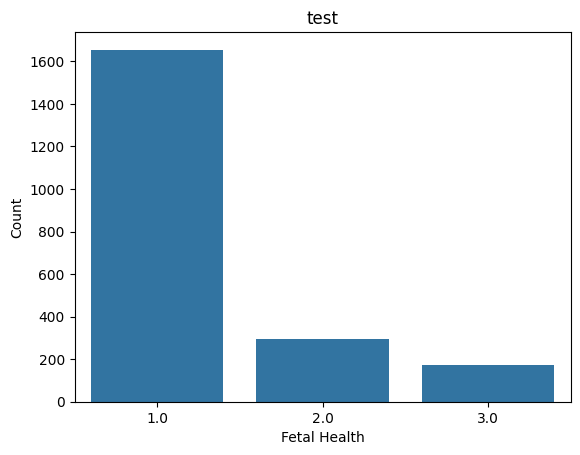

In [51]:
# Plot outcome of Fetal Health stats
plt.figure()
sns.countplot(x='fetal_health', data=df)
plt.xlabel('Fetal Health')
plt.ylabel('Count')
plt.title('test')
plt.show()

We can look at a few attributes that are very likely to have a larger impact on the model's predictions. I have selected three to be looked at preemptively:
- severe_decelerations
- abnormal_short_term_variability
- prolongued_decelerations

In [52]:
count_decelerations = df[(df['fetal_health'] > 1) & (df['severe_decelerations'] > 0)].shape[0]

print(f"Count of severe decelerations: {sum(df.severe_decelerations > 0)}")
print(f"Count of severe develerations that are abnormal: {count_decelerations}")
print((count_decelerations / sum(df.severe_decelerations > 0) * 100), "% of severe decelerations are abnormal")

Count of severe decelerations: 7
Count of severe develerations that are abnormal: 6
85.71428571428571 % of severe decelerations are abnormal


In [53]:
prolongued_decelerations = df[(df['fetal_health'] > 1) & (df['prolongued_decelerations'] > 0)].shape[0]

print(f"Count of prolonged decelerations: {sum(df.prolongued_decelerations > 0)}")
print(f"Count of prolonged decelerations that are abnormal: {prolongued_decelerations}")
print((prolongued_decelerations / sum(df.prolongued_decelerations > 0) * 100), "% of prolonged decelerations are abnormal")

Count of prolonged decelerations: 177
Count of prolonged decelerations that are abnormal: 108
61.016949152542374 % of prolonged decelerations are abnormal


In [54]:
print("Note, 61% chosen as it is the third quartile for this attribute")
count_variability = df[(df['fetal_health'] > 1) & (df['abnormal_short_term_variability'] > 61)].shape[0]

print(f"Count of abnormal short term variability above 61%: {sum(df.abnormal_short_term_variability > 61)}")
print(f"Count of abnormal short term variability above 61% that are abnormal: {count_variability}")
print((count_variability / sum(df.abnormal_short_term_variability > 61) * 100), "% of abnormal short term variabilities above 61% are abnormal")

Note, 61% chosen as it is the third quartile for this attribute
Count of abnormal short term variability above 61%: 507
Count of abnormal short term variability above 61% that are abnormal: 290
57.1992110453649 % of abnormal short term variabilities above 61% are abnormal


From this short experiment, we can see that severe decelerations are uncommon, but have a drastic impact on the outcome, with 6 out of 7 instances being recognized as abnormal. 

By comparison, the abnormal short termed variability percentage and count of prolonged decelerations had less of a connection. This means that manual observatoin would not be sufficient in finding the impact of these attributes. Now, let us use machine learning models to classify data.

## Choosing a Model

We'll start by separating the data into training data and test data. The variable X are all of the features, or, every column in the dataset besides the final fetal_health attribute.

The variable y is the target value that we are predicting using the features. This is a single attribute 'fetal_health' which is the predicted health of the fetus.

We can use the train_test_split function from sklearn to automaticaly split the data into train and test data. 

In [55]:
from sklearn.model_selection import train_test_split

X = df.drop(columns='fetal_health')

# Needs to be converted to 0, 1, 2 for classification. The raw dataset is 1, 2, 3.
y = df['fetal_health'] - 1

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=0)
print('X_train size: {}, X_test size: {}'.format(X_train.shape, X_test.shape))

X_train size: (1700, 21), X_test size: (425, 21)


Now we should standardize the data. This isn't needed for all models, like XGBoost, but we will be testing multiple models that do need it. We will use StandardScaler from sklearn for this task.

In [56]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

Now we will use GridSearchCV to find the best algorithm for this problem. GridSearchCV will run through all the different parameters that are fed into the parameter grid and return the best combination of parameters based on accuracy. [Source: Towards Data Science](https://towardsdatascience.com/gridsearchcv-for-beginners-db48a90114ee/)

We use ShuffleSplit cross-validation, which splits the data multiple times into training and test sets (5 times in this case). In each split 80% of the data is used for training and 20% is used for testing. The model is trained on the training set and evaluated on the test set to get an accuracy score. These scores are averaged across all splits to get a estimate of the model's performance.

We are testing 5 classification algorithms:
- Logistic Regression: Uses C parameter to control regularization (Overfitting).
- Decision Tree Classifier: Criterion controls quality of split (?) max_depth controls how deep the tree goes.
- Random Forest Classifier: n_estimators is how many trees are in the forest.
- SVC (Support Vector Machine): C is regularization, Kernal types I dont fully understand yet, used sample from CoPilot search.
- XGBoost: n_estimators control number of trees, max_depth is the tree complexity, learning_rate is how each tree corrects the errors of the prevoius one (this is an ensemble algorithm.)

In [57]:
from sklearn.model_selection import GridSearchCV, ShuffleSplit
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
import pandas as pd

# Cross-validation setup
cv_shuffle = ShuffleSplit(n_splits=5, test_size=0.20, random_state=0)

# Logistic Regression
log_reg = LogisticRegression(solver='lbfgs')
log_reg_params = {'C': [1, 5, 10]}
gs_log_reg = GridSearchCV(log_reg, log_reg_params, cv=cv_shuffle)
gs_log_reg.fit(X_train, y_train)

# Decision Tree
dec_tree = DecisionTreeClassifier(splitter='best')
dec_tree_params = {'criterion': ['gini', 'entropy'], 'max_depth': [5, 10]}
gs_dec_tree = GridSearchCV(dec_tree, dec_tree_params, cv=cv_shuffle)
gs_dec_tree.fit(X_train, y_train)

# Random Forest
rand_forest = RandomForestClassifier(criterion='gini')
rand_forest_params = {'n_estimators': [10, 15, 20, 50, 100, 200]}
gs_rand_forest = GridSearchCV(rand_forest, rand_forest_params, cv=cv_shuffle)
gs_rand_forest.fit(X_train, y_train)

# Support Vector Machine
svm = SVC(gamma='auto')
svm_params = {'C': [1, 10, 20], 'kernel': ['rbf', 'linear']}
gs_svm = GridSearchCV(svm, svm_params, cv=cv_shuffle)
gs_svm.fit(X_train, y_train)

# XGBoost
xgb = XGBClassifier(eval_metric='logloss')
xgb_params = {
    'n_estimators': [50, 100, 200],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.2]
}
gs_xgb = GridSearchCV(xgb, xgb_params, cv=cv_shuffle)
gs_xgb.fit(X_train, y_train)

results = pd.DataFrame([
    {
        'model': 'logistic_regression',
        'best_params': gs_log_reg.best_params_,
        'score': gs_log_reg.best_score_
    },
    {
        'model': 'decision_tree',
        'best_params': gs_dec_tree.best_params_,
        'score': gs_dec_tree.best_score_
    },
    {
        'model': 'random_forest',
        'best_params': gs_rand_forest.best_params_,
        'score': gs_rand_forest.best_score_
    },
    {
        'model': 'svm',
        'best_params': gs_svm.best_params_,
        'score': gs_svm.best_score_
    },
    {
        'model': 'xgboost',
        'best_params': gs_xgb.best_params_,
        'score': gs_xgb.best_score_
    }
])

results


,model,best_params,score
0,logistic_regression,{'C': 5},0.893529
1,decision_tree,"{'criterion': 'entropy', 'max_depth': 10}",0.936471
2,random_forest,{'n_estimators': 100},0.950000
3,svm,"{'C': 20, 'kernel': 'rbf'}",0.937647
4,xgboost,"{'learning_rate': 0.1, 'max_depth': 7, 'n_esti...",0.957647


The resulting accuracy score shows me that the random forest and XGBoost algorithms are the most accurate. Seeing as how XGBoost is slightly more accurate, and the fact that Virtua Health projects tend to favor the algorithm, we will be going forward with XGBoost.

Interestingly, checking the cross value score using the optimal parameters given by gridsearch seems to give 95% which is one percent lower than the estimation.

In [58]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(XGBClassifier(learning_rate=0.2, max_depth=5, n_estimators=50, random_state=0), X_train, y_train, cv=5)
print('Average Accuracy : {}%'.format(round(sum(scores)*100/len(scores)), 3))

Average Accuracy : 94%


I tried messing around with some other parameters to find a slight improvement. I found that n_estimators=100 seemed to bring it to 96%.

In [59]:
scores = cross_val_score(XGBClassifier(learning_rate=0.5, max_depth=5, n_estimators=100, random_state=0), X_train, y_train, cv=5)
print('Average Accuracy : {}%'.format(round(sum(scores)*100/len(scores)), 3))

Average Accuracy : 94%


## Creating the Model
Now, we can begin creating the model with the parameters we tested for. 

In [60]:
model = XGBClassifier(learning_rate=0.2, max_depth=5, n_estimators=50, random_state=0, n_jobs=1)
model.fit(X_train, y_train)

,objective,'multi:softprob'
,base_score,None
,booster,None
,callbacks,None
,colsample_bylevel,None
,colsample_bynode,None
,colsample_bytree,None
,device,None
,early_stopping_rounds,None
,enable_categorical,False
,eval_metric,None


Now lets create a confusion Matrix. We'll start by testing the model on the test set.

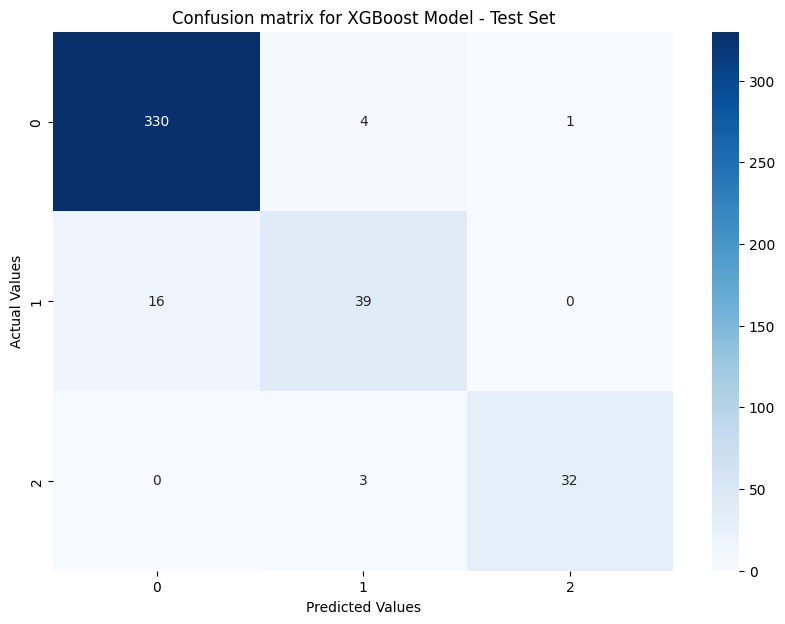

In [61]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
y_pred = model.predict(X_test)
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(10,7))
p = sns.heatmap(cm, annot=True, cmap="Blues", fmt='g')
plt.title('Confusion matrix for XGBoost Model - Test Set')
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.show()

It would appear that the model rarely predicts an extreme wrong prediction. If there is a wrong prediction, it is usually close, such as classifying a 1 instead of a 2, or 0 instead of a 1. There is only one case of it predicting a 2 when it really was a 0. 

A low false negative count would be excellent for this data set, however there were 16 cases of the fetus being suspect that were not picked up.

In [62]:
score = round(accuracy_score(y_test, y_pred),4)*100
print("Accuracy on test set: {}%".format(score))

Accuracy on test set: 94.35%


In [63]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.95      0.99      0.97       335
         1.0       0.85      0.71      0.77        55
         2.0       0.97      0.91      0.94        35

    accuracy                           0.94       425
   macro avg       0.92      0.87      0.89       425
weighted avg       0.94      0.94      0.94       425



So far the model works pretty well for the test set. Few false positives/negatives and many true postivies. The accuracy seems to have dropped down back to 95.3% from the 96% initial estimation.

Now lets do the same for the training set, this is to observe overfitting/underfitting issues.

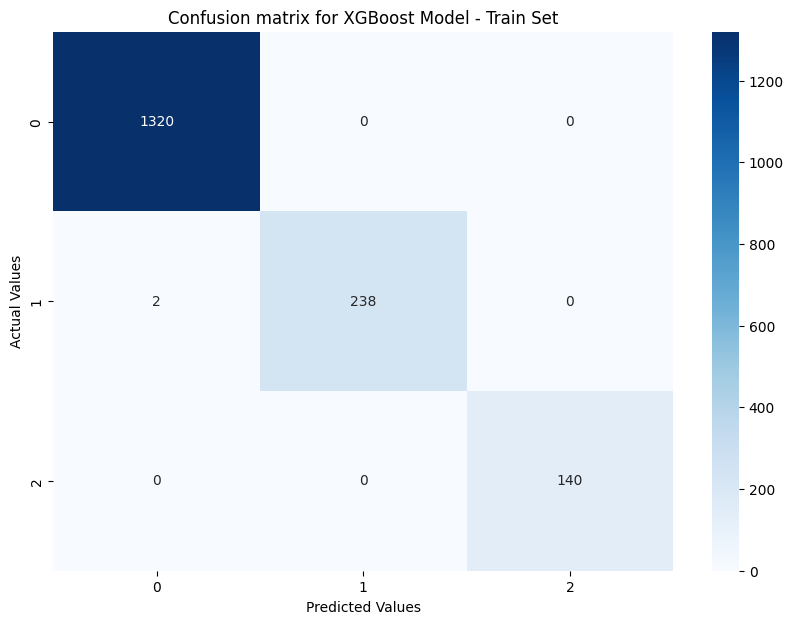

In [64]:
y_train_pred = model.predict(X_train)
cm = confusion_matrix(y_train, y_train_pred)

plt.figure(figsize=(10,7))
p = sns.heatmap(cm, annot=True, cmap="Blues", fmt='g')
plt.title('Confusion matrix for XGBoost Model - Train Set')
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.show()

In [65]:
score = round(accuracy_score(y_train, y_train_pred),4)*100
print("Accuracy on training set: {}%".format(score))

Accuracy on training set: 99.88%


In [66]:
print(classification_report(y_train, y_train_pred))

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      1320
         1.0       1.00      0.99      1.00       240
         2.0       1.00      1.00      1.00       140

    accuracy                           1.00      1700
   macro avg       1.00      1.00      1.00      1700
weighted avg       1.00      1.00      1.00      1700



The train set has a comparitively better accuracy than the test data. With 99.88% to 95.3%. I figured this could cause some problems with potential overfitting. But changing the, say, number of n_estimators, did little to bring those numbers closer. Still, the difference should not be too much to worry about, especially since the high test accuracy is a factor.

## Predictions
Now lets create a test function where we can use the model to make a prediction. We'll create a function that takes all 21 attributes and uses .predict to give the prediction result on the given data. There is a lot of data to pass through, so it is expected that the cardiotography machine that is scanning this data would likely connect straight to the model to make the prediction in real time.

In [67]:
def predict_fetal_health(
    baseline_value, accelerations, fetal_movement, uterine_contractions,
    light_decelerations, severe_decelerations, prolongued_decelerations,
    abnormal_short_term_variability, mean_value_of_short_term_variability,
    percentage_of_time_with_abnormal_long_term_variability, histogram_width, 
    mean_value_of_long_term_variability, histogram_min, histogram_max, 
    histogram_number_of_peaks, histogram_number_of_zeroes, histogram_mode,
    histogram_mean, histogram_median, histogram_variance, histogram_tendency
):
    
    feature_names = [
        'baseline_value', 'accelerations', 'fetal_movement', 'uterine_contractions',
        'light_decelerations', 'severe_decelerations', 'prolongued_decelerations',
        'abnormal_short_term_variability', 'mean_value_of_short_term_variability',
        'percentage_of_time_with_abnormal_long_term_variability', 'mean_value_of_long_term_variability',
        'histogram_width', 'histogram_min', 'histogram_max', 'histogram_number_of_peaks',
        'histogram_number_of_zeroes', 'histogram_mode', 'histogram_mean',
        'histogram_median', 'histogram_variance', 'histogram_tendency'
    ]

    inputs = [
        float(baseline_value),
        float(accelerations),
        float(fetal_movement),
        float(uterine_contractions),
        float(light_decelerations),
        float(severe_decelerations),
        float(prolongued_decelerations),
        float(abnormal_short_term_variability),
        float(mean_value_of_short_term_variability),
        float(percentage_of_time_with_abnormal_long_term_variability),
        float(mean_value_of_long_term_variability),
        float(histogram_width),
        float(histogram_min),
        float(histogram_max),
        float(histogram_number_of_peaks),
        float(histogram_number_of_zeroes),
        float(histogram_mode),
        float(histogram_mean),
        float(histogram_median),
        float(histogram_variance),
        float(histogram_tendency)
    ]
    
    input_df = pd.DataFrame([inputs], columns=feature_names)
    x_scaled = sc.transform(input_df)

    prediction = model.predict(x_scaled)[0]
    probabilities = model.predict_proba(x_scaled)[0]
    confidence = probabilities[prediction]

    label_map = {0: 'Normal', 1: 'Suspect', 2: 'Pathological'}
    label = label_map[prediction]

    return label, round(confidence * 100, 2)


Now lets test on some data from the combined set.

In [68]:
label, confidence = predict_fetal_health(
    132,        # baseline_value
    0.006,      # accelerations
    0,          # fetal_movement
    0.006,      # uterine_contractions
    0.003,      # light_decelerations
    0,          # severe_decelerations
    0,          # prolongued_decelerations
    17,         # abnormal_short_term_variability
    2.1,        # mean_value_of_short_term_variability
    0,          # percentage_of_time_with_abnormal_long_term_variability
    10.4,       # mean_value_of_long_term_variability
    130,        # histogram_width
    68,         # histogram_min
    198,        # histogram_max
    6,          # histogram_number_of_peaks
    1,          # histogram_number_of_zeroes
    141,        # histogram_mode
    136,        # histogram_mean
    140,        # histogram_median
    12,         # histogram_variance
    0           # histogram_tendency
                # Fetal_heath should be 0, normal
)

print(f"Predicted Fetal Health: {label} ({confidence}% confidence)")

Predicted Fetal Health: Normal (99.37000274658203% confidence)


This output is correct, the expected output should be normal. Although, the data passed to it could have been a part of the training set. I won't know for sure unless I manually remove it. Though, looking at the abnormally high confidence score, we can safely assume it was from the train set.

In [69]:
label, confidence = predict_fetal_health(
    140,        # baseline_value
    0.002,      # accelerations
    0,          # fetal_movement
    0.008,      # uterine_contractions
    0,          # light_decelerations
    0.001,      # severe_decelerations
    0.001,      # prolongued_decelerations
    31,         # abnormal_short_term_variability
    1.4,        # mean_value_of_short_term_variability
    0,          # percentage_of_time_with_abnormal_long_term_variability
    11.5,       # mean_value_of_long_term_variability
    102,        # histogram_width
    61,         # histogram_min
    163,        # histogram_max
    5,          # histogram_number_of_peaks
    0,          # histogram_number_of_zeroes
    99,         # histogram_mode
    121,        # histogram_mean
    129,        # histogram_median
    94,         # histogram_variance
    1           # histogram_tendency
                # Fetal_heath should be 0, normal
)

print(f"Predicted Fetal Health: {label} ({confidence}% confidence)")

Predicted Fetal Health: Suspect (45.150001525878906% confidence)


I tested many more elements from the dataset until I found this one. This output is incorrect, the expected output should be normal. These errors are to be expected as the accuracy of the model was 95.3%.

Looking at the confidence score we can clearly see that this is a rough estimation on an unclear data point, hence the inaccuracy.

In [70]:
label, confidence = predict_fetal_health(
    134,        # baseline_value
    0.001,      # accelerations
    0,          # fetal_movement
    0.01,       # uterine_contractions
    0.009,      # light_decelerations
    0,          # severe_decelerations
    0.002,      # prolongued_decelerations
    26,         # abnormal_short_term_variability
    5.9,        # mean_value_of_short_term_variability
    0,          # percentage_of_time_with_abnormal_long_term_variability
    0,          # mean_value_of_long_term_variability
    150,        # histogram_width
    50,         # histogram_min
    200,        # histogram_max
    5,          # histogram_number_of_peaks
    3,          # histogram_number_of_zeroes
    76,         # histogram_mode
    107,        # histogram_mean
    107,        # histogram_median
    170,        # histogram_variance
    0           # histogram_tendency
                # Fetal_heath should be 2, pathological
)

print(f"Predicted Fetal Health: {label} ({confidence}% confidence)")

Predicted Fetal Health: Pathological (88.6500015258789% confidence)


This was the row we removed at the start of the notebook. The predicted health from both the expert and the model was pathological, which matches. This means the model was correct on data it has never seen, and that the split to create the training set and test set worked as intended.

Please proceed to https://www.BrodieBerger.com/fetal_health for a live demo! 

The demo uses the same model generated in this notebook, but set up to be an interactive Flask web app.
## Important Features and Their Impacts
Lets check if my estimations on expected important features matched up with what the model says. As a reminder, my three estimated features were:
- severe_decelerations
- abnormal_short_term_variability
- prolongued_decelerations

In [71]:
importances = pd.Series(model.feature_importances_, index=X.columns)
importances.sort_values(ascending=False)

mean_value_of_short_term_variability                      0.238554
histogram_mean                                            0.182102
percentage_of_time_with_abnormal_long_term_variability    0.086646
accelerations                                             0.072938
abnormal_short_term_variability                           0.068355
prolongued_decelerations                                  0.055046
uterine_contractions                                      0.035878
histogram_mode                                            0.033102
histogram_number_of_peaks                                 0.030059
baseline_value                                            0.029462
histogram_max                                             0.028372
fetal_movement                                            0.020053
histogram_median                                          0.019512
histogram_variance                                        0.017535
histogram_number_of_zeroes                                0.01

It looks like I was incorrect about the most important features. The top three most important features are:
- mean_value_of_short_term_variability
- histogram_mean
- percentage_of_time_with_abnormal_long_term_variability

In fact, severe_decelerations was the only feature with listed as a 0 on this importance prediction. I'm unsure exactly why that is, though it is likely due to a low count of this factor being above 0. In fact, only 7 out of 2000 elements were above 0.

Now lets test some data in order to find what caused a specific prediction. We can import the shap package to use shapely additive explanations to help explain the output of the model.

We'll start by selecting a random index. This index represents a single patient case (or cardiotocograph reading) from the training data. Using SHAP, we can calculate how much each feature contributed to the model's final decision for this sample. The SHAP values tell us whether a specific feature pushed the prediction toward a healthier or more pathological outcome.

Next, we'll determine the predicted class for that sample and extract the SHAP values for that particular class. We can identify the top three most influential features for that prediction. For each of these, we'll compare the actual value from that sample to the average value for healthy pregnancies in our dataset. This comparison allows us to explain not only which features influenced the decision, but determine whether the value was unusually high or low compared to what is typical in healthy cases.

Finally, we'll visualize this in a bar graph. Note that the shape values will be mostly positive if viewing a non-normal fetus. For the website, we will most likely not show these, as a healthy fetus would likely not need more monitoring.

 95%|=================== | 4851/5100 [00:13<00:00]       

Predicted class: 2
Top 3 important features:
- histogram_mean:
    SHAP value: 3.852
    Current Value: 104.000 (below healthy avg of 134.876)
- prolongued_decelerations:
    SHAP value: 0.891
    Current Value: 0.003 (above healthy avg of 0.000)
- fetal_movement:
    SHAP value: 0.865
    Current Value: 0.340 (above healthy avg of 0.007)


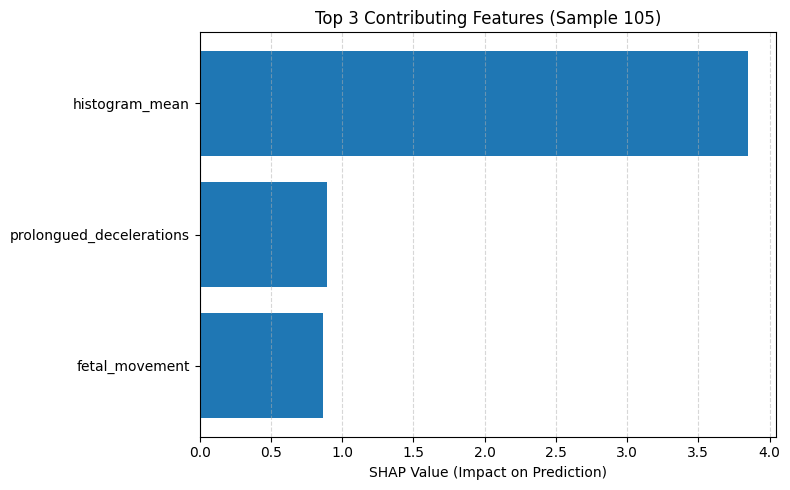

In [73]:
import shap

# Define feature names
feature_names = [
    'baseline_value', 'accelerations', 'fetal_movement', 'uterine_contractions',
    'light_decelerations', 'severe_decelerations', 'prolongued_decelerations',
    'abnormal_short_term_variability', 'mean_value_of_short_term_variability',
    'percentage_of_time_with_abnormal_long_term_variability', 'mean_value_of_long_term_variability',
    'histogram_width', 'histogram_min', 'histogram_max', 'histogram_number_of_peaks',
    'histogram_number_of_zeroes', 'histogram_mode', 'histogram_mean',
    'histogram_median', 'histogram_variance', 'histogram_tendency'
]

# Pick a sample index to analyze
sample_index = 105  # adjust this index to test others

# Initialize SHAP explainer for multiclass classification
explainer = shap.Explainer(model, X_train)
shap_values = explainer(X_train)  # Shape: (n_samples, n_features, n_classes)

# Predict the class for the selected sample
pred_class = np.argmax(model.predict_proba(X_train[[sample_index]]), axis=1)[0]

# Get SHAP values for the predicted class
shap_vals = shap_values.values[sample_index, :, pred_class]  # Shape: (21,)

# Get top 3 most influential features
top_indices = np.argsort(np.abs(shap_vals))[::-1][:3]

# Calculate original (unscaled) sample and healthy averages
sample_scaled = X_train[sample_index].reshape(1, -1)
sample_unscaled = sc.inverse_transform(sample_scaled)[0]

healthy_mask = y_train == 0  # healthy = class 0
healthy_avg_scaled = X_train[healthy_mask].mean(axis=0).reshape(1, -1)
healthy_avg_unscaled = sc.inverse_transform(healthy_avg_scaled)[0]

# Display results
print(f"Predicted class: {pred_class}")
print("Top 3 important features:")

for i in top_indices:
    name = feature_names[i]
    shap_val = shap_vals[i]
    unscaled_val = sample_unscaled[i]
    avg_unscaled = healthy_avg_unscaled[i]
    comparison = "above" if unscaled_val > avg_unscaled else "below" if unscaled_val < avg_unscaled else "equal to"

    print(f"- {name}:")
    print(f"    SHAP value: {shap_val:.3f}")
    print(f"    Current Value: {unscaled_val:.3f} ({comparison} healthy avg of {avg_unscaled:.3f})")

# Bar chart visualization
labels = [feature_names[i] for i in top_indices]
values = [shap_vals[i] for i in top_indices]

plt.figure(figsize=(8, 5))
bars = plt.barh(labels[::-1], values[::-1], color=['#1f77b4' if v > 0 else '#d62728' for v in values[::-1]])
plt.xlabel("SHAP Value (Impact on Prediction)")
plt.title(f"Top 3 Contributing Features (Sample {sample_index})")
plt.grid(True, axis='x', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


To help with generating shap values, here are all of the samples organized by their predicted class:

In [74]:
y_pred = model.predict(X_train)

class_1_indices = np.where(y_pred == 1)[0]
class_2_indices = np.where(y_pred == 2)[0]

# Print some example indices
print("Indices of samples predicted as class 1 (Suspect):")
print(class_1_indices)

print("Indices of samples predicted as class 2 (Pathological):")
print(class_2_indices)


Indices of samples predicted as class 1 (Suspect):
[   8   10   33   38   40   42   45   46   56   60   71   74   76   85
   88  109  117  127  135  141  144  145  147  156  161  166  174  181
  182  193  194  203  211  230  233  235  248  252  265  280  286  288
  289  295  304  309  318  322  332  333  335  347  351  353  354  360
  362  365  367  370  382  394  396  397  400  409  410  414  417  420
  444  460  470  486  487  488  494  496  502  509  536  555  570  571
  575  584  592  593  596  598  604  605  606  613  635  644  650  664
  667  668  686  698  703  704  712  717  720  721  723  733  734  742
  743  748  770  775  778  799  803  826  835  842  847  862  866  868
  870  875  876  888  892  895  906  913  919  923  927  932  934  940
  941  948  953  960  968  976  982  987  990  993  998  999 1007 1008
 1017 1020 1026 1031 1032 1045 1049 1055 1070 1077 1082 1087 1091 1100
 1117 1124 1131 1135 1136 1144 1149 1162 1187 1189 1190 1201 1203 1205
 1209 1214 1227 1235 1243 

In [76]:
import joblib

model_filename = 'fetal_health_model.pkl'
joblib.dump(model, model_filename)

scaler_filename = 'scaler.pkl'
joblib.dump(sc, scaler_filename)


['scaler.pkl']